# 图像特效-卡通效果

In [9]:
from __future__ import division
%matplotlib inline
import cv2
from scipy.misc import imresize
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
src = cv2.imread('../datas/face2.jpg')
gray = cv2.imread('../datas/face2.jpg',0)
rgb = cv2.cvtColor(src,cv2.COLOR_BGR2RGB)

In [3]:
def quantize(image, q_level):
    im_shape = image.shape
    for j in range(im_shape[1]):
        for i in range(im_shape[0]):
            if image[i,j] > 0 and image[i,j] <=10:
                image[i,j] = q_level
            elif image[i,j] > 10 and image[i,j] <= 20:
                image[i,j] = 2*q_level
            elif image[i,j] > 20 and image[i,j] <= 30:
                image[i,j] = 3*q_level
            elif image[i,j] > 30 and image[i,j] <= 40:
                image[i,j] = 4*q_level
            elif image[i,j] > 40 and image[i,j] <= 50:
                image[i,j] = 5*q_level
            elif image[i,j] > 50 and image[i,j] <= 60:
                image[i,j] = 6*q_level
            elif image[i,j] > 60 and image[i,j] <= 70:
                image[i,j] = 7*q_level
            elif image[i,j] > 70 and image[i,j] <= 80:
                image[i,j] = 8*q_level
            elif image[i,j] > 80 and image[i,j] <= 90:
                image[i,j] = 9*q_level
            elif image[i,j] > 90 and image[i,j] <= 100:
                image[i,j] = 10*q_level
    return image

In [4]:
def detectEdge(I, sigE, T, phiE):
    I1 = cv2.GaussianBlur(I, (5,5), sigE)
    I2 = cv2.GaussianBlur(I, (5,5), np.sqrt(1.6)*sigE)
    out = (I1 - T*I2)
    out_shape = out.shape
    for j in range(out_shape[1]):
        for i in range(out_shape[0]):
            if out[i,j] > 0:
                out[i,j] = 1
            elif out[i,j] <= 0:
                out[i,j] = 1+np.tanh(phiE*out[i,j])
    return out

In [5]:
def gaussian_kernel(kernal_size, sigma):
    interval = (2*sigma+1.)/(kernal_size)
    x = np.linspace(-sigma-interval/2., sigma+interval/2., kernal_size+1)
    kern1d = np.diff(st.norm.cdf(x))
    kernel_raw = np.sqrt(np.outer(kern1d, kern1d))
    kernel = kernel_raw/kernel_raw.sum()
    return kernel

def bilateralFilter(image, K, ksig):
    ss = ksig[0]
    sr = ksig[1]
    G = gaussian_kernel(2*K+1, ss)
    dimI = image.shape
    out = np.zeros(dimI)
    for i in range(dimI[0]):
        for j in range (dimI[1]):
            imin = max(i-K, 1);
            imax = min(i+K, dimI[0]);
            jmin = max(j-K, 1);
            jmax = min(j+K, dimI[1]);
            region = image[imin:imax, jmin:jmax]
            H = np.exp(-(region-image[i,j])**2/(2*(sr**2)));
            F = H*G[imin-i+K+1:imax-i+K+1,jmin-j+K+1:jmax-j+K+1];
            out[i,j] = sum(np.array(F).flatten()*np.array(region).flatten())/sum(np.array(F).flatten());
    return out

In [6]:
def normalize_lab(image_lab):
    return image_lab[:,:,0]*(100/255)

In [7]:
def cartoonize(image, kernel_size=5, kernel_sigma=[3,2], q_level=10, sigmaE=0.5, phiE=1.0, T=0.99):
#     image = cv2.imread(image_path)
    image = imresize(image, 0.5)
    shape = image.shape
#     cv2.imshow('original image', image)
#     cv2.waitKey()
#     cv2.destroyAllWindows()     
#     print "The original image dimension: %dx%dx%d"%(shape[0], shape[1], shape[2])
    image_lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    image_l = normalize_lab(image_lab)
    counter = 0
#     print "Applying bilateral filter..."  
    
    while counter<2:    
        image_l = bilateralFilter(image_l, kernel_size, kernel_sigma)
        counter += 1
    counter = 0
    I1 = quantize(image_l, q_level)
#     print "image quantized."
#     print "Applying bilateral filter..."
    while counter<2: 
        image_l = bilateralFilter(image_l, kernel_size, kernel_sigma)
        counter += 1
    I2 = detectEdge(image_l, sigmaE, T, phiE)
#     print "edges in the images detected."
#     print "creating final image..."
    out = np.multiply(I1,I2)
    out_final = np.empty(shape, dtype=np.uint8)
    out_final[:,:,0] = out
    out_final[:,:,1] = image_lab[:,:,1]
    out_final[:,:,2] = image_lab[:,:,2]
    return cv2.cvtColor(out_final, cv2.COLOR_LAB2RGB)

c:\programdata\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


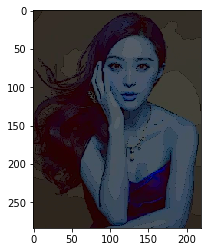

In [10]:
dst = cartoonize(rgb)
plt.imshow(dst)